In [2]:
%%time

from autodeploy.setup import Setup, Executor, Tracker, Workflow
from autodeploy.deploy import Deploy

# App folder
app_dir = '/home/guess/Desktop/autodeploy/examples/demo2/data-science/'

executors1 = [Executor(name='gathering', 
                       file='gathering.py',
                       dockerfile='Dockerfile_gathering'),
              
              Executor(name='preprocessing', 
                       file='preprocessing.py',
                       requirements='req_preprocessing.txt')]

workflow1 = Workflow(name='workflow1', 
                     executors=executors1,
                     tracker=Tracker(port=8001))

executors2 = [Executor(name='modeling', 
                      file='modeling.py',
                      parameters={'preprocessed_data': 'preprocessed_data.csv',
                                  'model_path': 'models',
                                  'n_estimators': 10},
                      requirements='req_modeling.txt'),
              
              Executor(name='modeling2', 
                      file='modeling2.py',
                      parameters={'preprocessed_data': 'preprocessed_data.csv',
                                  'model_path': 'models2',
                                  'n_estimators': 10},
                      requirements='req_modeling.txt')]
# Parallel
workflow2 = Workflow(name='workflow2', 
                     executors=executors2,
                     tracker=Tracker(port=8002),
                     parallel=True)

workflower = Setup(app_dir, workflows=[workflow1, workflow2],
                             verbose=False)

# Build the nodes
workflower.build_workflows()

# Start containers and run workflows
deployer = Deploy(app_dir, workflower, verbose=False)

deployer.start_workflows()
deployer.run_workflows()

100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

CPU times: user 118 ms, sys: 12.3 ms, total: 130 ms
Wall time: 3.59 s


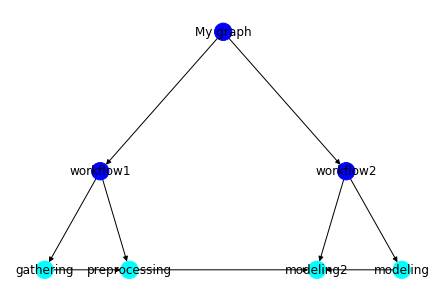

In [6]:
workflower.draw_workflow('My graph')

In [7]:
# %%timeit -n 10

# deployer.start_workflows()
# deployer.run_workflows()
# time = 4.02 s $\pm$ 322

In [9]:
%%timeit -n 10


import os 

base_path =  os.path.join(app_dir, 'workflow')
gathering_path = os.path.join(base_path, 'gathering.py')
preprocessing_path = os.path.join(base_path, 'preprocessing.py')

model1 = os.path.join(base_path, 'modeling.py')
model2 = os.path.join(base_path, 'modeling2.py')

os.chdir(base_path)

!python $gathering_path && python $preprocessing_path && python $model1  && python $model2 

   species  specimen_number  eccentricity  ...  third_moment  uniformity  entropy
0        1                1       0.72694  ...      0.005232    0.000275  1.17560
1        1                2       0.74173  ...      0.002708    0.000075  0.69659
2        1                3       0.76722  ...      0.000921    0.000038  0.44348
3        1                4       0.73797  ...      0.001154    0.000066  0.58785
4        1                5       0.82301  ...      0.000560    0.000024  0.34214

[5 rows x 16 columns]
Accuracy: 0.735
Accuracy: 0.735
   species  specimen_number  eccentricity  ...  third_moment  uniformity  entropy
0        1                1       0.72694  ...      0.005232    0.000275  1.17560
1        1                2       0.74173  ...      0.002708    0.000075  0.69659
2        1                3       0.76722  ...      0.000921    0.000038  0.44348
3        1                4       0.73797  ...      0.001154    0.000066  0.58785
4        1                5       0.82301  

## Scenario 3

In [3]:
%%timeit -n 1

from autodeploy.setup import Setup, Executor, Tracker, Workflow
from autodeploy.deploy import Deploy

# App folder
app_dir = '/home/guess/Desktop/autodeploy/examples/demo2/data-science/'


n_estimators = [5, 7]
percentage_data = [0.8, 1]

for n_estimator in n_estimators: 
    for p_data in percentage_data:
        executors1 = [Executor(name='gathering', 
                               file='gathering.py',
                               dockerfile='Dockerfile_gathering',
                               parameters={'raw_data_path': 'leaf.csv',
                                            'percentage': p_data}),

                      Executor(name='preprocessing', 
                               file='preprocessing.py',
                               requirements='req_preprocessing.txt')]

        workflow1 = Workflow(name='workflow1', 
                             executors=executors1,
                             tracker=Tracker(port=8001))

        executors2 = [Executor(name='modeling', 
                              file='modeling.py',
                              parameters={'preprocessed_data': 'preprocessed_data.csv',
                                          'model_path': 'models',
                                          'n_estimators': n_estimator},
                              requirements='req_modeling.txt'),
                      
                      Executor(name='modeling2', 
                              file='modeling2.py',
                              parameters={'preprocessed_data': 'preprocessed_data.csv',
                                          'model_path': 'models2',
                                          'n_estimators': n_estimator+2},
                              requirements='req_modeling.txt')]
        # Parallel
        workflow2 = Workflow(name='workflow2', 
                             executors=executors2,
                             tracker=Tracker(port=8002),
                             parallel=True)

        workflower = Setup(app_dir, workflows=[workflow1, workflow2],
                                     verbose=False)

        # Build the nodes
        workflower.build_workflows()

        # Start containers and run workflows
        deployer = Deploy(app_dir, workflower, verbose=False)

        deployer.start_workflows()
        deployer.run_workflows()


100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

14.9 s ± 373 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%%timeit -n 1


import os 
from autodeploy.setup import Setup, Executor, Tracker, Workflow
from autodeploy.deploy import Deploy

# App folder
app_dir = '/home/guess/Desktop/autodeploy/examples/demo2/data-science/'
base_path =  os.path.join(app_dir, 'workflow')
gathering_path = os.path.join(base_path, 'gathering.py')
preprocessing_path = os.path.join(base_path, 'preprocessing.py')

model1 = os.path.join(base_path, 'modeling.py')
model2 = os.path.join(base_path, 'modeling2.py')

os.chdir(base_path)

n_estimators = [5, 7]
percentage_data = [0.8, 1]

for n_estimator in n_estimators: 
    for p_data in percentage_data:
        n_2 = n_estimator + 2
        !python $gathering_path --percentage $p_data && python $preprocessing_path   && python $model1 --n_estimators $n_estimator  && python $model2 --n_estimators $n_2

   species  specimen_number  eccentricity  ...  third_moment  uniformity  entropy
0        1                1       0.72694  ...      0.005232    0.000275  1.17560
1        1                2       0.74173  ...      0.002708    0.000075  0.69659
2        1                3       0.76722  ...      0.000921    0.000038  0.44348
3        1                4       0.73797  ...      0.001154    0.000066  0.58785
4        1                5       0.82301  ...      0.000560    0.000024  0.34214

[5 rows x 16 columns]
Accuracy: 0.782
Accuracy: 0.782
   species  specimen_number  eccentricity  ...  third_moment  uniformity  entropy
0        1                1       0.72694  ...      0.005232    0.000275  1.17560
1        1                2       0.74173  ...      0.002708    0.000075  0.69659
2        1                3       0.76722  ...      0.000921    0.000038  0.44348
3        1                4       0.73797  ...      0.001154    0.000066  0.58785
4        1                5       0.82301  

In [ ]:
# n_2 = b

# plots


\begin{table}[]
\begin{tabular}{lll}
\textbf{Scenario} & \textbf{Naive approach (s)} & \textbf{Scanflow (s)} \\
A: 3 sequential nodes                 & 2.95 $\pm$ 0.14             & 2.60  $\pm$ 0.22              \\
B: 2 sequential nodes, 2 parallel nodes                 & 6.43  $\pm$ 0.57              & 4.02  $\pm$ 0.32             \\
C: 4 different workflows                 & 24.40  $\pm$ 0.90               & 14.90  $\pm$ 0.37             
\end{tabular}
\caption{Execution time for three scenarios using a standard execution (sequentially) and using Scanflow (using the ordering feature for parallel execution). }
\label{tab:table-exp1}
\end{table}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


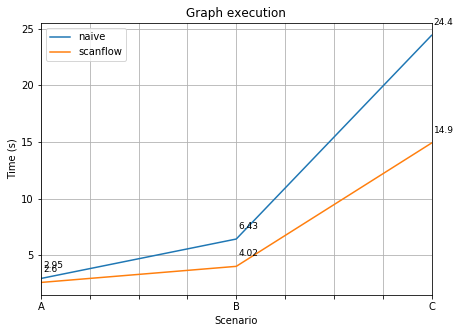

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

naive_res = [2.95, 6.43, 24.40]
scanflow_res = [2.60, 4.02, 14.90]

df = pd.DataFrame({'naive': naive_res, 'scanflow': scanflow_res})
df.index = ['A', 'B', 'C']
fig, ax = plt.subplots(figsize=(7, 5))

style = dict(size=9, color='black')
ax.set_ylabel("Time (s)")
ax.set_xlabel("Scenario")
# cols_to_compare = ['Baseline', 'AE+AL', 'RND+AL']
df.plot(title='Graph execution', 
                                                       ax=ax);
ax.grid(zorder=0)
for col in df.columns:
    for id, val in enumerate(df[col]):
        ax.text(id+0.01, val+0.9, str(round(val, 3)), **style)
        
fig.savefig("graph_execution.png")
fig.savefig("graph_execution.eps")

,naive,scanflow
A,2.95,2.60
B,6.43,4.02
C,24.40,14.90
